<h3>Upload Data</h3>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/trying"

In [3]:
%cd /content/drive/MyDrive/trying
!ls -a

/content/drive/MyDrive/trying
 brain-tumor-classification-mri.zip   Testing	'Tubes ML.ipynb'
 kaggle.json			      Training


In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

brain-tumor-classification-mri.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import os
import zipfile

local_zip = 'brain-tumor-classification-mri.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
%cd '/tmp/'
!ls -a

/tmp
.
..
dap_multiplexer.335d7a0da8a6.root.log.INFO.20211121-143548.49
dap_multiplexer.INFO
debugger_1odiai4zx1
drivefs_ipc.0
drivefs_ipc.0_shell
initgoogle_syslog_dir.0
Testing
tmp398qbk9i
Training


In [6]:
train_dir = '/tmp/Training'
gli_train_dir = train_dir + '/glioma_tumor'
men_train_dir = train_dir + '/meningioma_tumor'
no_train_dir  = train_dir + '/no_tumor'
pit_train_dir = train_dir + '/pituitary_tumor'

test_dir = '/tmp/Testing'
gli_test_dir = test_dir + '/glioma_tumor'
men_test_dir = test_dir + '/meningioma_tumor'
no_test_dir  = test_dir + '/no_tumor'
pit_test_dir = test_dir + '/pituitary_tumor'

In [7]:
print("Training")
print("Total Training Glioma Tumor     :", len(os.listdir(gli_train_dir)))
print("Total Training Meningioma Tumor :", len(os.listdir(men_train_dir)))
print("Total Training No Tumor         :", len(os.listdir(no_train_dir)))
print("Total Training Pituitary_Tumor  :", len(os.listdir(pit_train_dir)))
print("Testing")
print("Total Testing Glioma Tumor     :", len(os.listdir(gli_test_dir)))
print("Total Testing Meningioma Tumor :", len(os.listdir(men_test_dir)))
print("Total Testing No Tumor         :", len(os.listdir(no_test_dir)))
print("Total Testing Pituitary_Tumor  :", len(os.listdir(pit_test_dir)))

Training
Total Training Glioma Tumor     : 826
Total Training Meningioma Tumor : 822
Total Training No Tumor         : 395
Total Training Pituitary_Tumor  : 827
Testing
Total Testing Glioma Tumor     : 100
Total Testing Meningioma Tumor : 115
Total Testing No Tumor         : 105
Total Testing Pituitary_Tumor  : 74


In [8]:
import cv2
import numpy as np

In [9]:
def gather_data(data_dir):
    dir_data = []
    dir_label = []

    for dirpath, dirnames, filenames in os.walk(data_dir):
        for file in filenames:
            if ".jpg" in file:
                imagePath = os.path.join(dirpath, file)
                image = cv2.imread(imagePath)
                image = cv2.resize(image, (150,150))
                dir_data.append(image)
                label = imagePath.split(os.path.sep)[-2]
                dir_label.append(label)

    dir_data = np.array(dir_data)
    dir_label = np.array(dir_label)

    return dir_data, dir_label

<h3>Data Preprocessing</h3>

In [10]:
train_data, train_label = gather_data(train_dir) # Gather data train
test_data, test_label = gather_data(test_dir) # Gather data test

In [11]:
print("Train Data  = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Test Data   = ", test_data.shape)
print("Test Label  = ", test_label.shape)

Train Data  =  (2870, 150, 150, 3)
Train Label =  (2870,)
Test Data   =  (394, 150, 150, 3)
Test Label  =  (394,)


In [12]:
print("Data sebelum di-normalisasi ", test_data[0][0][0])

x_test = test_data.astype('float32') / 255.0
x_train = train_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_test[0][0][0])

Data sebelum di-normalisasi  [0 0 0]
Data setelah di-normalisasi  [0. 0. 0.]


In [13]:
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['meningioma_tumor' 'meningioma_tumor' 'meningioma_tumor'
 'meningioma_tumor' 'meningioma_tumor' 'meningioma_tumor'
 'meningioma_tumor' 'meningioma_tumor' 'meningioma_tumor'
 'meningioma_tumor']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1]


<h3>Definisikan Model</h3>

In [14]:
import tensorflow

In [15]:
y_train = tensorflow.keras.utils.to_categorical(y_train, 4)
y_test = tensorflow.keras.utils.to_categorical(y_test, 4)

In [16]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Conv2D, MaxPooling2D, GlobalMaxPooling2D, Flatten, BatchNormalization, Activation

In [17]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(4, activation='softmax')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 128)               8640128   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 8,640,644
Trainable params: 8,640,644
Non-trainable params: 0
_________________________________________________________________


In [19]:
import tensorflow as tf
from tensorflow.keras import callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')> 0.90):
      print("\nAkurasi validasi telah mencapai >90%!")
      self.model.stop_training = True


callbacks = myCallback()

In [20]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['acc'])

In [21]:
H = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
90/90 [==============================] - 6s 60ms/step - loss: 3.3388 - acc: 0.5164 - val_loss: 2.8476 - val_acc: 0.4848
Epoch 2/100
90/90 [==============================] - 5s 58ms/step - loss: 0.7307 - acc: 0.7202 - val_loss: 3.4331 - val_acc: 0.4924
Epoch 3/100
90/90 [==============================] - 5s 58ms/step - loss: 0.8506 - acc: 0.6955 - val_loss: 3.2650 - val_acc: 0.4569
Epoch 4/100
90/90 [==============================] - 5s 58ms/step - loss: 0.5642 - acc: 0.7843 - val_loss: 2.8848 - val_acc: 0.4315
Epoch 5/100
90/90 [==============================] - 5s 56ms/step - loss: 0.4751 - acc: 0.8164 - val_loss: 3.1041 - val_acc: 0.5990
Epoch 6/100
90/90 [==============================] - 5s 57ms/step - loss: 0.4729 - acc: 0.8132 - val_loss: 3.7719 - val_acc: 0.5787
Epoch 7/100
90/90 [==============================] - 5s 57ms/step - loss: 0.3844 - acc: 0.8530 - val_loss: 4.1553 - val_acc: 0.5736
Epoch 8/100
90/90 [==============================] - 5s 57ms/step - loss: 0.

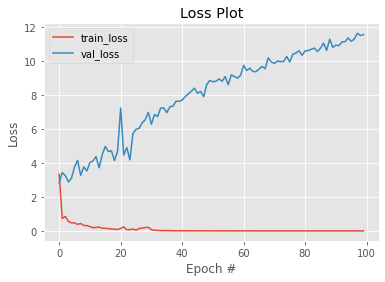

In [23]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

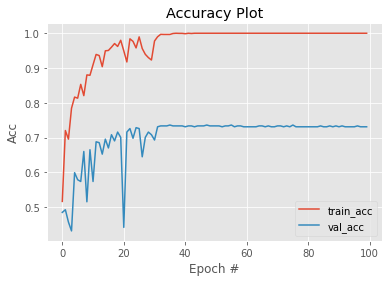

In [24]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import classification_report

pred = model.predict(x_train)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_train, labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       826
           1       1.00      1.00      1.00       822
           2       1.00      1.00      1.00       395
           3       1.00      1.00      1.00       827

   micro avg       1.00      1.00      1.00      2870
   macro avg       1.00      1.00      1.00      2870
weighted avg       1.00      1.00      1.00      2870
 samples avg       1.00      1.00      1.00      2870



In [28]:
import tensorflow as tf
model.save('model.h5')
new_model = tf.keras.models.load_model('model.h5')

# Show the model architecture
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 128)               8640128   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 8,640,644
Trainable params: 8,640,644
Non-trainable params: 0
_________________________________________________________________


In [30]:
plt.savefig("tubes6.svg")

<Figure size 432x288 with 0 Axes>